# Air Quality Predication
![alt text](https://drive.google.com/uc?id=1tcHDyLqOq6e0ZtlMvDmABHFaC798ITLP)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.csv to AirQualityUCI.csv
Saving AirQualityUCI.xlsx to AirQualityUCI.xlsx


-> Additional Libaray Installation

In [3]:
!pip install prophet


-> below code is used to import modules

In [4]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from prophet import Prophet

# Data Preprocesing
![alt text](https://drive.google.com/uc?id=1fsXuSf-Ovifw-VewRbhgQ-wnClXwH9XA)


**Additional Variable Information**
* Date (DD/MM/YYYY)
* Time (HH.MM.SS)
* True hourly averaged concentration CO in mg/m^3 (reference analyzer)
* PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
* True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
* True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
* PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
* True hourly averaged NOx concentration in ppb (reference analyzer)
* PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
* True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
* PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
* PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
* Temperature in Â°C
* Relative Humidity (%)
* AH Absolute Humidity

In [5]:
data_csv = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
print("Reading Csv File : " , data_csv.head(10))
print("Getting Info of Csv File :" , data_csv.info())
print("Shape of Columns : " , data_csv.shape)

Reading Csv File :           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1  10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2  10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3  10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4  10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
5  10/03/2004  23.00.00     1.2       1197.0      38.0       4.7   
6  11/03/2004  00.00.00     1.2       1185.0      31.0       3.6   
7  11/03/2004  01.00.00     1.0       1136.0      31.0       3.3   
8  11/03/2004  02.00.00     0.9       1094.0      24.0       2.3   
9  11/03/2004  03.00.00     0.6       1010.0      19.0       1.7   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972

In [6]:
data_xls = pd.read_excel('AirQualityUCI.xlsx')
print("Reading Excel File : " , data_xls.head(10))
print("Getting Info of Excel File :" , data_xls.info(verbose=True))
print("Shape of Columns : " , data_xls.shape)

Reading Excel File :          Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   
5 2004-03-10  23:00:00     1.2      1197.00        38   4.741012   
6 2004-03-11  00:00:00     1.2      1185.00        31   3.624399   
7 2004-03-11  01:00:00     1.0      1136.25        31   3.326677   
8 2004-03-11  02:00:00     0.9      1094.00        24   2.339416   
9 2004-03-11  03:00:00     0.6      1009.75        19   1.696658   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       97

* By Reading the data of csv we get know that all columns are been inetegrated in one but you can use the data by adding sep function during reading csv file
* But in Excel File the data columns are seprated

* There are no null value in this
* But null value is been assigined as Missing values are tagged with -200 value

In [7]:
data_csv.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

In [8]:
data_csv = data_csv.iloc[:, :-2]

In [9]:
data_csv.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [10]:
data_csv.loc[[9356]]      # this is column no where last data is there

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9356,04/04/2005,14.00.00,2.2,1071.0,-200.0,11.9,1047.0,265.0,654.0,168.0,1129.0,816.0,28.5,13.1,0.5028


In [11]:
data_csv = data_csv.head(9356)

In [12]:
data_csv.shape

(9356, 15)

In [13]:
data_csv.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9351,04/04/2005,09.00.00,3.9,1297.0,-200.0,13.6,1102.0,523.0,507.0,187.0,1375.0,1583.0,18.2,36.3,0.7487
9352,04/04/2005,10.00.00,3.1,1314.0,-200.0,13.5,1101.0,472.0,539.0,190.0,1374.0,1729.0,21.9,29.3,0.7568
9353,04/04/2005,11.00.00,2.4,1163.0,-200.0,11.4,1027.0,353.0,604.0,179.0,1264.0,1269.0,24.3,23.7,0.7119
9354,04/04/2005,12.00.00,2.4,1142.0,-200.0,12.4,1063.0,293.0,603.0,175.0,1241.0,1092.0,26.9,18.3,0.6406
9355,04/04/2005,13.00.00,2.1,1003.0,-200.0,9.5,961.0,235.0,702.0,156.0,1041.0,770.0,28.3,13.5,0.5139


# Handling Missing Values

* Step 1 : Convert the -200 to NaN
* Step 2 : This NaN value change to value driven by mean function

![alt text](https://drive.google.com/uc?id=1-D8ojK7yG0v0mA5fG8hwx6U0jkCtkvHL)

In [14]:
data_csv.replace(to_replace = -200, value=numpy.NaN, inplace=True)

<ipython-input-14-7b86b50a8190>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_csv.replace(to_replace = -200, value=numpy.NaN, inplace=True)


In [15]:
data_csv.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8442
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [16]:
data_csv.isin([-200]).sum(axis=0)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [17]:
numeric_columns = data_csv.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data_csv[numeric_columns]

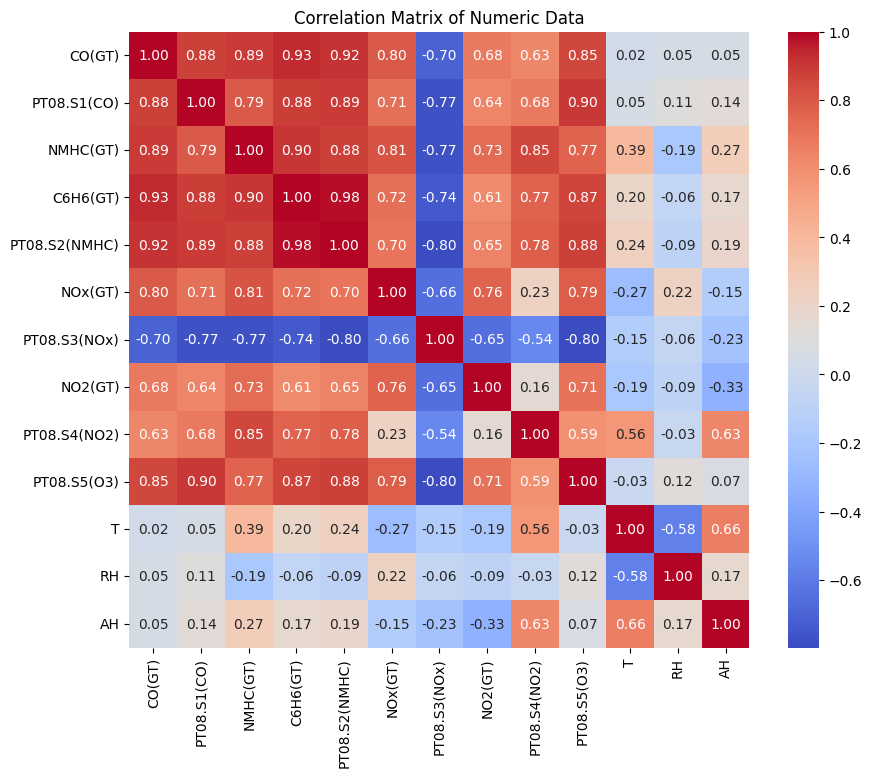

In [18]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numeric Data")
plt.show()

In [19]:
numeric_data = numeric_data.fillna(numeric_data.mean())

In [20]:
numeric_data.isnull().sum()

CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [21]:
data_date_time = data_csv[['Date','Time']]

In [22]:
data_csv = pd.concat([data_date_time, numeric_data], axis=1)

In [23]:
data_csv.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

After Cleaning the data we can use this in machine learning
Using this data we can do two things.

* Forecasting
* Regression

# Forecasting and Regression

![alt text](https://drive.google.com/uc?export=view&id=1_xDXVqtkLprUdd97hpeU4sKlJmvIjo2Y)



* FB Prophet Model is used to train the machine on live or pervious data of date and time basically Prophet model works on date and time series

* FB Prophet Model Documentation : https://facebook.github.io/prophet/docs/installation.html#python


![alt text](https://drive.google.com/uc?export=view&id=1QgfR-IzDWiQyLZCU4KeQGKLJvtHVyK-c)

In [24]:
# In FB Prophet model we must convert date from DD/MM/YYYY to YYYY-MM-DD

date_info = data_csv['Date']
date_info = pd.to_datetime(date_info, format='%d/%m/%Y')
date_info.head()


0   2004-03-10
1   2004-03-10
2   2004-03-10
3   2004-03-10
4   2004-03-10
Name: Date, dtype: datetime64[ns]

In [25]:
# Convert Time series from "." to ":"
time_info = data_csv['Time']
time_info = time_info.str.replace('.', ':')
time_info.head()

0    18:00:00
1    19:00:00
2    20:00:00
3    21:00:00
4    22:00:00
Name: Time, dtype: object

In [26]:
# Combine two columns
data_time = pd.concat([date_info, time_info], axis=1)
data_time.head()

,Date,Time
0,2004-03-10,18:00:00
1,2004-03-10,19:00:00
2,2004-03-10,20:00:00
3,2004-03-10,21:00:00
4,2004-03-10,22:00:00


In [27]:
# In prophet model algo of fb we have combine column in one called ds
data_time['ds'] = data_time['Date'].astype(str)+ ' ' + data_time['Time'].astype(str)

In [28]:
data_time.head()

,Date,Time,ds
0,2004-03-10,18:00:00,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2004-03-10 21:00:00
4,2004-03-10,22:00:00,2004-03-10 22:00:00


In [29]:
data_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9356 entries, 0 to 9355
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9356 non-null   datetime64[ns]
 1   Time    9356 non-null   object        
 2   ds      9356 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 219.4+ KB


**We have to convert ds from object to datetime64[ns]**

In [30]:
data = pd.DataFrame()

In [31]:
data['ds'] = pd.to_datetime(data_time['ds'])

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9356 entries, 0 to 9355
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      9356 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 73.2 KB


In [33]:
#True hourly averaged concentration CO in mg/m^3 (reference analyzer)
data['y'] = data_csv['CO(GT)']

In [34]:
data.tail()

,ds,y
9351,2005-04-04 09:00:00,3.9
9352,2005-04-04 10:00:00,3.1
9353,2005-04-04 11:00:00,2.4
9354,2005-04-04 12:00:00,2.4
9355,2005-04-04 13:00:00,2.1


**FB Prophet Model install and use for forecaste and regression.**

In [35]:
!pip install prophet

In [36]:
# Traning the prophet model on data

model = Prophet(yearly_seasonality=True)
model.fit(data)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpek3k1krv/lbjlydg2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpek3k1krv/69277h8w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64220', 'data', 'file=/tmp/tmpek3k1krv/lbjlydg2.json', 'init=/tmp/tmpek3k1krv/69277h8w.json', 'output', 'file=/tmp/tmpek3k1krv/prophet_modelzgew4_w0/prophet_model-20240710122325.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [37]:
future = model.make_future_dataframe(periods=365,freq='H')
print("Predicting the Future of value of ds \n ",future.tail())
forecast = model.predict(future)
print("Predicting the Future Value of y : \n", forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

"""
ds : date and time series in format of YYYY-MM-DD HH:MM:SS
yhat : predicted value
yhat_lower : lower bound of predicted value
yhat_upper : upper bound of predicted value

"""

Predicting the Future of value of ds 
                        ds
9716 2005-04-19 14:00:00
9717 2005-04-19 15:00:00
9718 2005-04-19 16:00:00
9719 2005-04-19 17:00:00
9720 2005-04-19 18:00:00
Predicting the Future Value of y : 
                       ds      yhat  yhat_lower  yhat_upper
9716 2005-04-19 14:00:00  1.925649    0.596598    3.243187
9717 2005-04-19 15:00:00  2.001134    0.664778    3.233293
9718 2005-04-19 16:00:00  2.243668    0.910684    3.567354
9719 2005-04-19 17:00:00  2.656983    1.413052    4.045839
9720 2005-04-19 18:00:00  3.096189    1.754045    4.503865


'\nds : date and time series in format of YYYY-MM-DD HH:MM:SS\nyhat : predicted value\nyhat_lower : lower bound of predicted value\nyhat_upper : upper bound of predicted value\n\n'

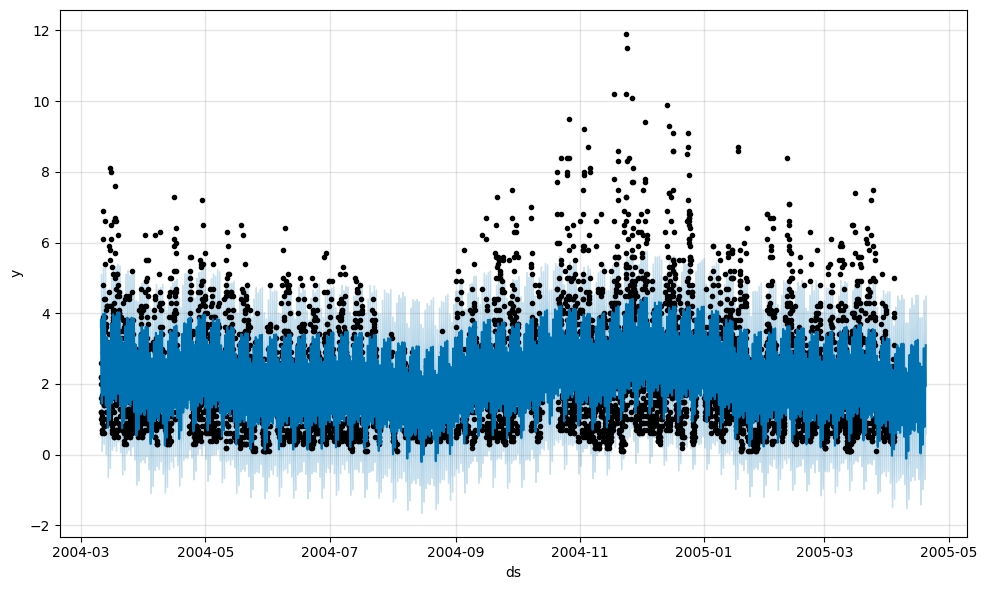

In [38]:
# Createing the forecast graph
fig = model.plot(forecast)

# Pipeline and Pickeling
![alt text](https://drive.google.com/uc?export=view&id=1jY_K9bbCYvibeH48Ph3btOnFe-xnIRGz)


In [59]:
import pandas as pd
import pickle

def load_data(file_path):
    return pd.read_csv(file_path, sep=';', decimal=',')

def preprocess_data(df, date_column, time_column, target_column):
    df = df.iloc[:, :-2]
    df = df.head(9356)
    df.replace(to_replace=-200, value=float('NaN'), inplace=True)
    df[date_column] = pd.to_datetime(df[date_column], format='%d/%m/%Y')
    df[time_column] = df[time_column].str.replace('.', ':')
    df['ds'] = df[date_column].astype(str) + ' ' + df[time_column].astype(str)
    df[target_column].fillna(df[target_column].mean(), inplace=True)
    df.rename(columns={target_column: 'y'}, inplace=True)
    return df

def apply_prophet(df):
    model = Prophet()
    model.fit(df)
    return model

def save_model(model, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(model, f)

def run_prophet_pipeline(file_path, date_column, time_column, target_column, model_file_path):
    data = load_data(file_path)
    preprocessed_data = preprocess_data(data, date_column, time_column, target_column)
    prophet_model = apply_prophet(preprocessed_data)
    save_model(prophet_model, model_file_path)

if __name__ == "__main__":
    file_path = '/content/AirQualityUCI.csv'
    date_column = 'Date'
    time_column = 'Time'
    target_column = 'CO(GT)'
    model_file_path = 'prophet_model.pkl'

    run_prophet_pipeline(file_path, date_column, time_column, target_column, model_file_path)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpek3k1krv/jf2g98rs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpek3k1krv/tqdg_mhv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93671', 'data', 'file=/tmp/tmpek3k1krv/jf2g98rs.json', 'init=/tmp/tmpek3k1krv/tqdg_mhv.json', 'output', 'file=/tmp/tmpek3k1krv/prophet_model74jvffr0/prophet_model-20240710130658.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
